In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
PassengerId=test['PassengerId']

In [3]:
sns.heatmap(train.corr(),annot=True)

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
all_data = pd.concat([train, test], ignore_index = True)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
all_data

Age Cabin Embarked      Fare  \
0     22.0   NaN        S    7.2500   
1     38.0   C85        C   71.2833   
2     26.0   NaN        S    7.9250   
3     35.0  C123        S   53.1000   
4     35.0   NaN        S    8.0500   
...    ...   ...      ...       ...   
1304   NaN   NaN        S    8.0500   
1305  39.0  C105        C  108.9000   
1306  38.5   NaN        S    7.2500   
1307   NaN   NaN        S    8.0500   
1308   NaN   NaN        C   22.3583   

                                                   Name  Parch  PassengerId  \
0                               Braund, Mr. Owen Harris      0            1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                                Heikkinen, Miss. Laina      0            3   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                              Allen, Mr. William Henry      0            5   
...                                                 ...    ...          ...   
1304                                 Spector, Mr. Woolf      0         1305   
1305                       Oliva y Ocana, Dona. Fermina      0         1306   
1306                       Saether, Mr. Simon Sivertsen      0         1307   
1307                                Ware, Mr. Frederick      0         1308   
1308                           Peter, Master. Michael J      1         1309   

      Pclass     Sex  SibSp  Survived              Ticket  
0          3    male      1       0.0           A/5 21171  
1          1  female      1       1.0            PC 17599  
2          3  female      0       1.0    STON/O2. 3101282  
3          1  female      1       1.0              113803  
4          3    male      0       0.0              373450  
...      ...     ...    ...       ...                 ...  
1304       3    male      0       NaN           A.5. 3236  
1305       1  female      0       NaN            PC 17758  
1306       3    male      0       NaN  SOTON/O.Q. 3101262  
1307       3    male      0       NaN              359309  
1308       3    male      1       NaN                2668  

[1309 rows x 12 columns]

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### 特征分析

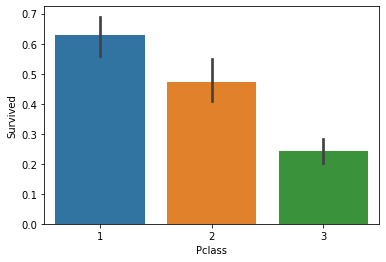

In [11]:
sns.barplot(x="Pclass",y="Survived",data=train)

 可以看出不同级别的票存活率不同，等级越高(1最高)存活的越多

In [12]:
sns.barplot(x="Sex",y="Survived",data=train)

女性存活率远高于男性

In [13]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

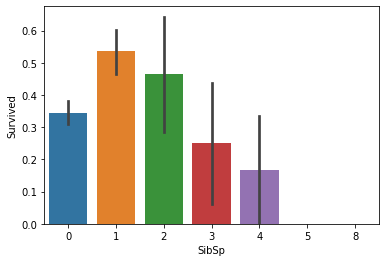

In [14]:
sns.barplot(x="SibSp",y="Survived",data=train)

配偶及兄弟姐妹数适中的乘客幸存率更高

In [15]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
facet=sns.FacetGrid(train,hue='Survived',aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')

Text(10.526514274691358, 0.5, 'density')

在20左侧有两段年龄影响较大，右侧不同年龄差别不大

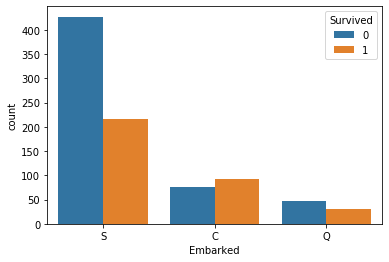

In [17]:
sns.countplot('Embarked',hue='Survived',data=train)

C生存的多

Text(10.526514274691358, 0.5, 'density')

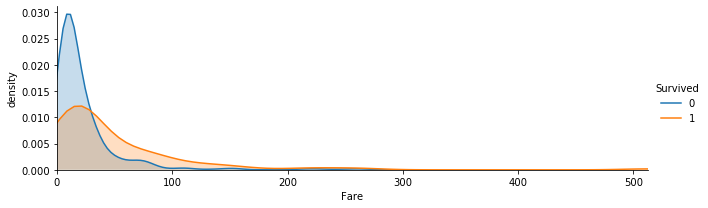

In [18]:
facet=sns.FacetGrid(train,hue='Survived',aspect=3)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlabel('Fare')
plt.ylabel('density')

看到费用较低时死亡率较高

In [19]:
train.Ticket.value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
347088      6
           ..
244310      1
347064      1
2677        1
112050      1
349209      1
Name: Ticket, Length: 681, dtype: int64

In [20]:
all_data['Title']=all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [21]:
all_data.Title.value_counts()



Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Dona              1
Don               1
the Countess      1
Jonkheer          1
Mme               1
Sir               1
Lady              1
Capt              1
Name: Title, dtype: int64

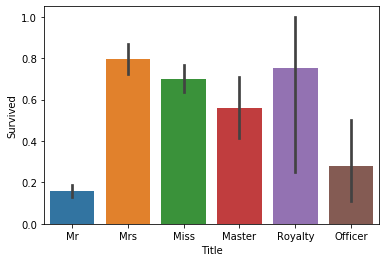

In [22]:
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title",y="Survived",data=all_data)

与称呼有关

In [23]:
Ticket_Count=dict(all_data['Ticket'].value_counts())
all_data['TicketGroup']=all_data['Ticket'].apply(lambda x:Ticket_Count[x])
all_data

Age Cabin Embarked      Fare  \
0     22.0   NaN        S    7.2500   
1     38.0   C85        C   71.2833   
2     26.0   NaN        S    7.9250   
3     35.0  C123        S   53.1000   
4     35.0   NaN        S    8.0500   
...    ...   ...      ...       ...   
1304   NaN   NaN        S    8.0500   
1305  39.0  C105        C  108.9000   
1306  38.5   NaN        S    7.2500   
1307   NaN   NaN        S    8.0500   
1308   NaN   NaN        C   22.3583   

                                                   Name  Parch  PassengerId  \
0                               Braund, Mr. Owen Harris      0            1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                                Heikkinen, Miss. Laina      0            3   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                              Allen, Mr. William Henry      0            5   
...                                                 ...    ...          ...   
1304                                 Spector, Mr. Woolf      0         1305   
1305                       Oliva y Ocana, Dona. Fermina      0         1306   
1306                       Saether, Mr. Simon Sivertsen      0         1307   
1307                                Ware, Mr. Frederick      0         1308   
1308                           Peter, Master. Michael J      1         1309   

      Pclass     Sex  SibSp  Survived              Ticket    Title  \
0          3    male      1       0.0           A/5 21171       Mr   
1          1  female      1       1.0            PC 17599      Mrs   
2          3  female      0       1.0    STON/O2. 3101282     Miss   
3          1  female      1       1.0              113803      Mrs   
4          3    male      0       0.0              373450       Mr   
...      ...     ...    ...       ...                 ...      ...   
1304       3    male      0       NaN           A.5. 3236       Mr   
1305       1  female      0       NaN            PC 17758  Royalty   
1306       3    male      0       NaN  SOTON/O.Q. 3101262       Mr   
1307       3    male      0       NaN              359309       Mr   
1308       3    male      1       NaN                2668   Master   

      TicketGroup  
0               1  
1               2  
2               1  
3               2  
4               1  
...           ...  
1304            1  
1305            3  
1306            1  
1307            1  
1308            3  

[1309 rows x 14 columns]

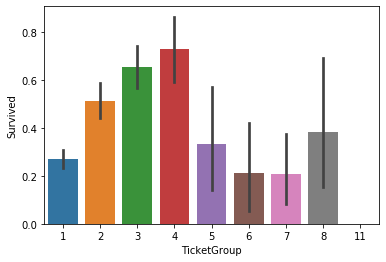

In [24]:
sns.barplot(x='TicketGroup',y='Survived',data=all_data)

与同票号人数有关

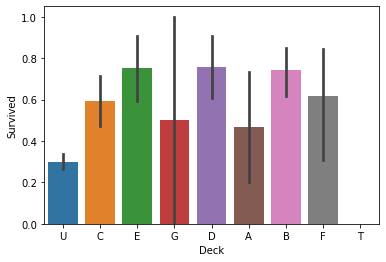

In [25]:
all_data['Cabin']=all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck",y="Survived",data=all_data)

### 数据清洗

In [26]:
from sklearn.ensemble import RandomForestRegressor
age_df = all_data[['Age', 'Pclass','Sex','Title']]
age_df=pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[ (all_data.Age.isnull()), 'Age' ] = predictedAges 

In [27]:
all_data.head()

Age    Cabin Embarked     Fare  \
0  22.0  Unknown        S   7.2500   
1  38.0      C85        C  71.2833   
2  26.0  Unknown        S   7.9250   
3  35.0     C123        S  53.1000   
4  35.0  Unknown        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket Title  TicketGroup Deck  
0       3    male      1       0.0         A/5 21171    Mr            1    U  
1       1  female      1       1.0          PC 17599   Mrs            2    C  
2       3  female      0       1.0  STON/O2. 3101282  Miss            1    U  
3       1  female      1       1.0            113803   Mrs            2    C  
4       3    male      0       0.0            373450    Mr            1    U

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
TicketGroup    1309 non-null int64
Deck           1309 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


In [29]:
all_data[all_data["Embarked"].isnull()]

Age Cabin Embarked  Fare                                       Name  \
61   38.0   B28      NaN  80.0                        Icard, Miss. Amelie   
829  62.0   B28      NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)   

     Parch  PassengerId  Pclass     Sex  SibSp  Survived  Ticket Title  \
61       0           62       1  female      0       1.0  113572  Miss   
829      0          830       1  female      0       1.0  113572   Mrs   

     TicketGroup Deck  
61             2    B  
829            2    B

In [30]:
all_data.groupby(by=["Pclass","Embarked"]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [31]:
all_data["Embarked"]=all_data["Embarked"].fillna("C")

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
TicketGroup    1309 non-null int64
Deck           1309 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


In [33]:
all_data[all_data['Fare'].isnull()]

Age    Cabin Embarked  Fare                Name  Parch  PassengerId  \
1043  60.5  Unknown        S   NaN  Storey, Mr. Thomas      0         1044   

      Pclass   Sex  SibSp  Survived Ticket Title  TicketGroup Deck  
1043       3  male      0       NaN   3701    Mr            1    U

In [34]:
fare=all_data[(all_data['Embarked']=='S')& (all_data['Pclass']==3)].Fare.median()
all_data['Fare']=all_data['Fare'].fillna(fare)

In [35]:
all_data['Surname']=all_data['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count=dict(all_data['Surname'].value_counts())
all_data['FamilyGroup']=all_data['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=15) | (all_data['Sex']=='female'))]
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) & (all_data['Sex']=='male')]

In [36]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child

GroupCount
1.000000         115
0.000000          32
0.750000           2
0.333333           1
0.142857           1

同组的女人和孩子基本上要么都存活要么都遇难

In [37]:
Male_Adlut=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adlut.columns=['GroupCount']
Male_Adlut

GroupCount
0.000000         122
1.000000          20
0.500000           6
0.333333           2
0.250000           1

女性和儿童幸存率高，成年男子幸存率低，可以把组内反常的单独处理

In [38]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Cacic', 'Ford', 'Goodwin', 'Rice', 'Caram', 'Elias', 'Van Impe', 'Lahtinen', 'Barbara', 'Palsson', 'Jussila', 'Turpin', 'Skoog', 'Johnston', 'Canavan', 'Vander Planke', 'Lobb', 'Bourke', 'Arnold-Franchi', 'Lefebre', 'Attalah', 'Sage', 'Boulos', 'Panula', 'Olsson', 'Ilmakangas', 'Zabour', 'Robins', 'Strom', 'Rosblom', 'Oreskovic', 'Danbom'}
{'Bishop', 'Greenfield', 'Bradley', 'Chambers', 'Cardeza', 'Nakid', 'Taylor', 'Beane', 'Frauenthal', 'Jussila', 'Jonsson', 'Frolicher-Stehli', 'Goldenberg', 'McCoy', 'Kimball', 'Dick', 'Beckwith', 'Duff Gordon', 'Daly', 'Harder'}


In [39]:
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [40]:
all_data=pd.concat([train, test])

In [41]:
all_data=all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','Parch','TicketGroup','SibSp','Deck']]

In [42]:
all_data

Survived  Pclass     Sex        Age      Fare Embarked    Title  Parch  \
0          0.0       3    male  22.000000    7.2500        S       Mr      0   
1          1.0       1  female  38.000000   71.2833        C      Mrs      0   
2          1.0       3  female  26.000000    7.9250        S     Miss      0   
3          1.0       1  female  35.000000   53.1000        S      Mrs      0   
4          0.0       3    male  35.000000    8.0500        S       Mr      0   
...        ...     ...     ...        ...       ...      ...      ...    ...   
1304       NaN       3    male  28.226256    8.0500        S       Mr      0   
1305       NaN       1  female  39.000000  108.9000        C  Royalty      0   
1306       NaN       3    male  38.500000    7.2500        S       Mr      0   
1307       NaN       3    male  28.226256    8.0500        S       Mr      0   
1308       NaN       3    male   6.035599   22.3583        C   Master      1   

      TicketGroup  SibSp Deck  
0               1      1    U  
1               2      1    C  
2               1      0    U  
3               2      1    C  
4               1      0    U  
...           ...    ...  ...  
1304            1      0    U  
1305            3      0    C  
1306            1      0    U  
1307            1      0    U  
1308            3      1    U  

[1309 rows x 11 columns]

In [43]:
all_data=pd.get_dummies(all_data)

In [44]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 27 columns):
Survived         891 non-null float64
Pclass           1309 non-null int64
Age              1309 non-null float64
Fare             1309 non-null float64
Parch            1309 non-null int64
TicketGroup      1309 non-null int64
SibSp            1309 non-null int64
Sex_female       1309 non-null uint8
Sex_male         1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Deck_A           1309 non-null uint8
Deck_B           1309 non-null uint8
Deck_C           1309 non-null uint8
Deck_D           1309 non-null uint8
Deck_E           1309 non-null uint8
Deck_F           1309 non-null uint8


In [45]:
train=all_data[all_data['Survived'].notnull()]
test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)

In [46]:
train.iloc[:,0].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 26 columns):
Pclass           418 non-null int64
Age              418 non-null float64
Fare             418 non-null float64
Parch            418 non-null int64
TicketGroup      418 non-null int64
SibSp            418 non-null int64
Sex_female       418 non-null uint8
Sex_male         418 non-null uint8
Embarked_C       418 non-null uint8
Embarked_Q       418 non-null uint8
Embarked_S       418 non-null uint8
Title_Master     418 non-null uint8
Title_Miss       418 non-null uint8
Title_Mr         418 non-null uint8
Title_Mrs        418 non-null uint8
Title_Officer    418 non-null uint8
Title_Royalty    418 non-null uint8
Deck_A           418 non-null uint8
Deck_B           418 non-null uint8
Deck_C           418 non-null uint8
Deck_D           418 non-null uint8
Deck_E           418 non-null uint8
Deck_F           418 non-null uint8
Deck_G           418 non-null uint8
Deck_T           418 non

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
x= train.values[:,1:]
y = train.values[:,0]

In [50]:
sc=StandardScaler()
x=sc.fit_transform(x)
test=sc.fit_transform(test)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest


In [52]:

clf=RandomForestClassifier(random_state = 10, max_features = 'sqrt')
param_test = {'n_estimators':list(range(20,50,2)), 
              'max_depth':list(range(3,60,3))}
gsearch=GridSearchCV(estimator=clf,param_grid=param_test,scoring='roc_auc',cv=10)
gsearch.fit(x,y)
print(gsearch.best_params_,gsearch.best_score_)


{'max_depth': 6, 'n_estimators': 28} 0.8766821718586424


In [53]:
from sklearn.pipeline import make_pipeline
#select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
#pipeline = make_pipeline(select, clf)
clf.fit(x, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=26,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=True)

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
cv_score=cross_val_score(clf,x,y,cv=10).mean()

In [56]:
cv_score

0.837278401997503

In [60]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(clf,n_estimators=10)
cv_score=cross_val_score(bc,x,y,cv=10).mean()
cv_score

0.8384019975031209

In [61]:
bc.fit(x,y)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=6,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
        

In [62]:

predictions=bc.predict(test)
submission = pd.DataFrame({"PassengerId":PassengerId,"Survived": predictions.astype(np.int32)})
submission.to_csv("submission8.csv", index=False)
